# Generazione di numeri casuali

La generazione di numeri casuali è essenziale ormai in ogni tipo di applicazione, per esempio in finanza e in statistica (simulazioni Monte Carlo).
Algoritmi e computer son, però, deterministici, dunque si son sviluppate varie tecniche per generare numeri pseudo-casuali con buone proprietà (bassa autocorrelazione, uniformità, riproducibilità…).

In particolare, ci concentriamo sulla generazione di numeri casuali da una distribuzione uniforme continua, dalla quale si può semplicemente passare a molte altre distribuzioni note (e.g. Bernoulli, Esponenziale etc) e vediamo una semplice applicazione del generatore così costruito, con la simulazione di una passeggiata aleatoria.

Se si volesse ottenere dei numeri davvero random (e.g. in crittografia), si dovrebbe ricorrere, tuttavia, ad altri metodi (difficilmente implementabili in Python ;) ), come mostrato in https://www.youtube.com/watch?v=1cUUfMeOijg&feature=youtu.be

PS Per info, problemi o altro, potete contattarmi all'indirizzo filippo.fedeli@mail.polimi.it o su cellulare al +393386561042

# Generatore Lineare Congruenziale




Iniziamo il progetto implementando un semplice generatore di numeri pseudo-casuali, il Generatore Lineare Congruenziale, algoritmo utilizzato, per esempio, dal comando rand di C, che si basa su un una immediata relazione ricorsiva.
Il funzionamento è descritto dall'algoritmo seguente :

• Spazio degli stati = {0, 1, . . . , m − 1} (m = modulo)

• Passo di ricorsione :  Xn = (a * Xn−1 + c) mod m

• output Un = Xn/m.

Più info su https://it.wikipedia.org/wiki/Generatore_lineare_congruenziale



In [122]:
state = 7 # stato interno del generatore (inizializzato a piacere) -> con stato uguale, si otterrà sempre la stessa sequenza

def LCG():
  a = 234268765
  c = 5463723
  m = 2**34
  global state # per modificare all'interno di una funzione una variabile globale è necessario dichiararla globale, per ora non tocchiamo questo punto e non ce ne preoccupiamo
  state= (a*state-1+c)%m      
  return state/m

Ora vogliamo testare il nostro generatore. Proviamo a vedere quanto è il **periodo** del nostro generatore, ovvero dopo quanto tempo inizia a ripetere la stessa sequenza di numeri. 

Un buon generatore dovrebbe avere un periodo il più alto possibile.
Per l'utilizzo attuale nelle simulazioni Monte Carlo, serve un periodo molto alto; il random base di python ha un periodo di 2^19937-1. 

(il random  base di python non è comunque utilizzabile per la crittografia, in quanto, conoscendo l'algoritmo sottostante, lo stato è precisamente indovinabile dopo 624 numeri generati (https://github.com/kmyk/mersenne-twister-predictor)

NB Per chiamare una funzione senza argomenti come la nostra e assegnare il valore restituito ad una variabile var, è necessario soltanto usare
var = LCG(). 

In [112]:
var=list()
var=[LCG() for i in range(1000)]
i=1
while var[i]!=var[0]:
    i+=1
print( "periodo:", i)
print(var[0:24])


periodo: 6
[0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143, 0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143, 0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143, 0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.8571428571428571, 0.5714285714285714, 0.7142857142857143]


# Passeggiata Aleatoria Bidimensionale


A questo punto, proviamo a usare il nostro generatore per simulare una passeggiata aleatoria bidimensionale discreta.

Partendo dal punto (0,0), ad ogni iterazione, un punto si muove di 1 unità in una delle quattro direzioni possibili (e.g. da (0,0) si può muovere in (1,0),(-1,0),(0,1),(0,-1)) 
con probabilità pi (inizialmente p1 = p2 = p3 = p4 = 0.25). Usando il generatore di numeri casuali appena costruito per campionare da un'uniforme continua in [0,1], simulare la passeggiata aleatoria. 

Conservare la posizione ad ogni istante temporale del punto in due liste separate x_list e y_list (per le coordinate x ed y).

In [123]:
x = y = 0
x_list=list()
y_list=list()
x_list.append(x)
y_list.append(y)

for i in range(1,100000):
    t=LCG()
    if t>=0 and t< 0.25 :
       x_list.append(x_list[i-1]+1)
       y_list.append(y_list[i-1])
    elif t>=0.25 and t<0.5 : 
       x_list.append(x_list[i-1])
       y_list.append(y_list[i-1]+1)
    elif t>=0.5 and t<0.75 :
       x_list.append(x_list[i-1]-1)
       y_list.append(y_list[i-1])
    elif  t>=0.75 :
       x_list.append(x_list[i-1])
       y_list.append(y_list[i-1]-1)

Qui finisce la parte di coding dell'assignment, eseguire le celle successive per installare matplotlib, visualizzare il risultato e rispondere alle ultime domande.

In [3]:
!pip install matplotlib

Ora, proviamo a rappresentare graficamente la passeggiata aleatoria.
Simulare per 100, 1000 e 20000 passi la passeggiata aleatoria. Dopo ogni simulazione, eseguire il codice sottostante e guardare l'output. Provare anche a cambiare i vari parametri del LCG, soprattutto m (orientativamente numero dispari tra 10 e 10000).

Cosa si può osservare? è davvero aleatoria?

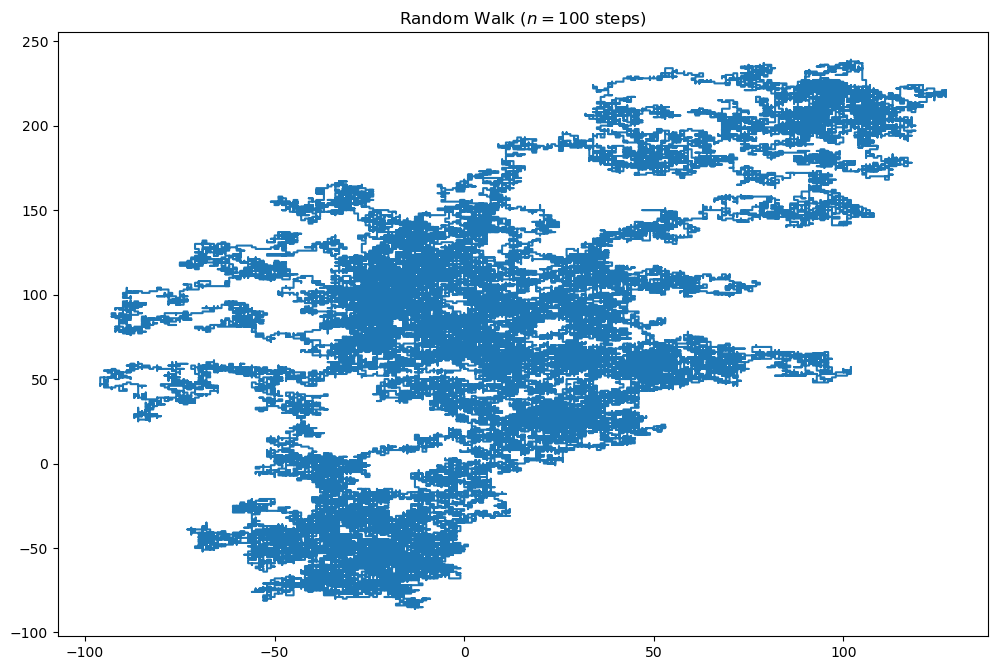

In [124]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.title("Random Walk ($n = " + str(n) + "$ steps)") 

plt.plot(x_list,y_list)
plt.show()

TO BE CONTINUED...